In [1]:
# Python libraries
# Classic,data manipulation and linear algebra

import pandas as pd
import numpy as np

# Plots
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
# Data processing, metrics and modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
#read data

df_ = pd.read_csv("cust_churn.csv")
df = df_.copy()

In [4]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
def check_df(dataframe, head=5):
    print(f'{" Info ":-^39}')
    print(dataframe.info())
    print(f'{" Head ":-^53}')
    print(dataframe.head(head))
    print(f'{" Tail ":-^58}')
    print(dataframe.tail(head))
    print(f'{" Quantiles ":-^97}')
    print(dataframe.describe([0.25, 0.50, 0.95, 0.99]).T)

In [6]:
check_df(df)

---------------- Info -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pa

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
df.dropna(inplace = True)

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It provides the names of categorical, numerical, and categorical but cardinal variables.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        df: Dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
     cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables:
        cat_cols + num_cols + cat_but_car = number of variables

    """
    
# cat_cols, cat_but_car
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [12]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 7032
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [13]:
profile = pp.ProfileReport(df)
profile

### Feature Engineering

In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [16]:
low, up = outlier_thresholds(df, num_cols)

df_temp = df[num_cols].describe().T
df_temp.assign(**{"low_limit": low, "up_limit": up})

,count,mean,std,min,25%,50%,75%,max,low_limit,up_limit
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00,-60.00000,124.00000
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75,-45.82500,171.27500
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80,-4688.48125,8884.66875


In [17]:
df2 = df.drop('customerID', axis=1).copy()

In [18]:
df2["Churn"] = LabelEncoder().fit_transform(df2["Churn"])
df_dummies = pd.get_dummies(df2)

In [19]:
internet_cols = [col for col in cat_cols if df2[col].isin(['No internet service']).any()]

df2[internet_cols] = df2[internet_cols].replace('No internet service', 'No')
df2["MultipleLines"] = df2["MultipleLines"].replace('No phone service', 'No')

In [20]:
rs = RobustScaler()
df_dummies[num_cols] = rs.fit_transform(df_dummies[num_cols])

In [21]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

### Machine Learning

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [29]:
# oversample
# The data is imbalanced. Therefore I use smote method to oversample the data

oversample = SMOTE(random_state=99, k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

AttributeError: 'NoneType' object has no attribute 'split'

In [30]:
def ml_classification(X_train, X_test, y_train, y_test):
        accuracy, f1, auc, = [], [], []

        random_state = 42

        ##classifiers
        classifiers = []
        classifiers.append(DecisionTreeClassifier(random_state=random_state))
        classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
        classifiers.append(RandomForestClassifier(random_state=random_state))
        classifiers.append(GradientBoostingClassifier(random_state=random_state))
        classifiers.append(XGBClassifier(random_state=random_state))
        classifiers.append(LGBMClassifier(random_state=random_state))
        classifiers.append(CatBoostClassifier(random_state=random_state, verbose=False))

        for classifier in classifiers:
            # classifier and fitting
            clf = classifier
            clf.fit(X_train, y_train)

            # predictions
            y_preds = clf.predict(X_test)
            y_probs = clf.predict_proba(X_test)

            # metrics
            accuracy.append(((accuracy_score(y_test, y_preds))) * 100)
            f1.append(((f1_score(y_test, y_preds))) * 100)
            auc.append(((roc_auc_score(y_test, y_probs[:, 1]))) * 100)

        results_df = pd.DataFrame({"Accuracy Score": accuracy,
                                   "f1 Score": f1, "AUC Score": auc,
                                   "ML Models": ["DecisionTree", "AdaBoost",
                                                 "RandomForest", "GradientBoosting",
                                                 "XGBoost", "LightGBM", "CatBoost"]})

        results = (results_df.sort_values(by=['f1 Score'], ascending=False)
                   .reset_index(drop=True))

        return results

In [31]:
results = ml_classification(X_train, X_test, y_train, y_test)
results

,Accuracy Score,f1 Score,AUC Score,ML Models
0,82.302772,61.633282,86.381038,GradientBoosting
1,82.302772,61.275272,85.926958,CatBoost
2,80.952381,59.880240,84.070938,XGBoost
3,81.307747,59.724349,85.174585,LightGBM
4,79.246624,53.943218,82.708832,RandomForest
5,73.276475,49.732620,65.929982,DecisionTree
6,75.124378,48.529412,66.276392,AdaBoost


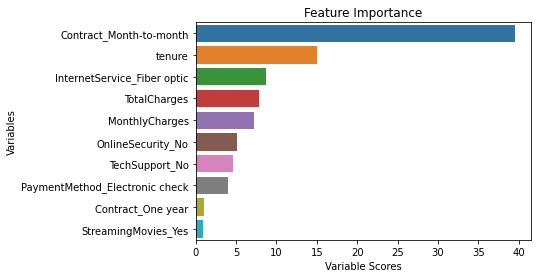

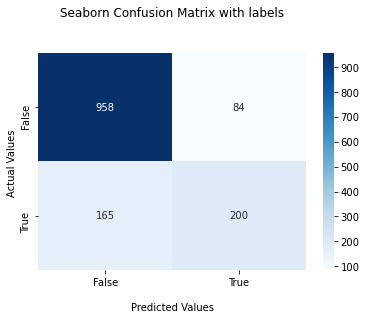

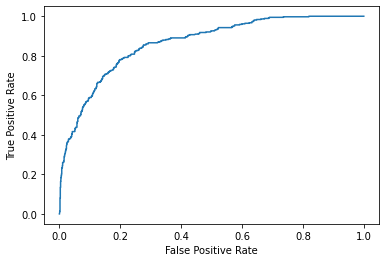

In [32]:
# Best Model
gbc_model = GradientBoostingClassifier()
gbc_model= gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)

# Feature Importance
feature_imp = pd.Series(gbc_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x= feature_imp[0:10]*100, y = feature_imp.index[0:10])
plt.xlabel("Variable Scores")
plt.ylabel("Variables")
plt.title("Feature Importance")
plt.show()

#create Confusion Matrix
cf_matrix = confusion_matrix(y_test, gbc_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#create ROC curve
y_pred_proba = gbc_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.70      0.55      0.62       365

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.82      1407

